In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/wine.csv")
#prints first 10 file in csv
df.head(40)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [ ]:
df.isnull().any().any()

False

In [ ]:
df = df.dropna()
print(df.shape)
print(list(df.columns))

(1599, 12)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [ ]:
df.replace(to_replace=np.nan,value=0000)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [ ]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
from pandas.core.strings.accessor import str_extractall
def numerizecolumns(name,df):
  dict={}
  listt=list(df[str(name)].unique())
  print(listt)
  for i in listt:
    # print("i values is :"+str(i))
    for j in range(0,len(listt)):
      # print("j values is "+str(j))
      if j not in dict.values():
        # print("j value adding is"+str(j))
        dict.update({str(i):j})
  df[str(name)]=df[str(name)].map(dict)
  print(dict)



numerizecolumns("quality",df)

['bad', 'good']
{'bad': 1, 'good': 0}


<Figure size 432x288 with 0 Axes>

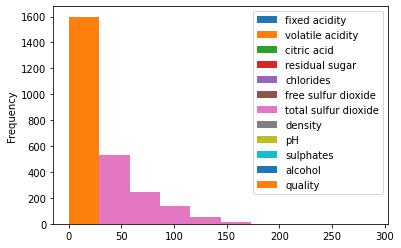

In [ ]:
plt.figure()
df.plot(kind='hist')

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
x=df.drop(columns='quality',axis=1)
y=df['quality']

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       1
1       1
2       1
3       0
4       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1599, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [ ]:
model= LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
x_train_prediction= model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [ ]:
print('Accuracy on training data',training_data_accuracy)

Accuracy on training data 0.743549648162627


In [ ]:
X=df.iloc[:,2:].values
X


array([[ 0.   ,  1.9  ,  0.076, ...,  0.56 ,  9.4  ,  1.   ],
       [ 0.   ,  2.6  ,  0.098, ...,  0.68 ,  9.8  ,  1.   ],
       [ 0.04 ,  2.3  ,  0.092, ...,  0.65 ,  9.8  ,  1.   ],
       ...,
       [ 0.13 ,  2.3  ,  0.076, ...,  0.75 , 11.   ,  0.   ],
       [ 0.12 ,  2.   ,  0.075, ...,  0.71 , 10.2  ,  1.   ],
       [ 0.47 ,  3.6  ,  0.067, ...,  0.66 , 11.   ,  0.   ]])

In [ ]:
y=df.iloc[:,1].values

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','density','pH','sulphates','alcohol']

X = df[features]
y = df['quality']

In [ ]:
print(X)
print(y)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      density    pH  sulpha

In [ ]:
#spliting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_test= ss.fit_transform(X_test)
X_train = ss.fit_transform(X_train)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
models=[DTC]
names=["DTC"]
for i,model in enumerate(models):
    pred=model.predict(X_test)
    cm=confusion_matrix(y_test,pred)
    AS=accuracy_score(y_test,pred)
    print(f'model {names[i]}')
    print(cm)
    print(AS)
    

model DTC
[[125  47]
 [ 42 106]]
0.721875


In [ ]:
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(200)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
tree.plot_tree(dtree, feature_names=features)

[Text(0.5382192637598284, 0.9782608695652174, 'alcohol <= 10.25\ngini = 0.498\nsamples = 1599\nvalue = [855, 744]'),
 Text(0.25638849177984274, 0.9347826086956522, 'sulphates <= 0.575\ngini = 0.449\nsamples = 842\nvalue = [287, 555]'),
 Text(0.1296640457469621, 0.8913043478260869, 'chlorides <= 0.08\ngini = 0.311\nsamples = 353\nvalue = [68, 285]'),
 Text(0.05575411007862759, 0.8478260869565217, 'volatile acidity <= 0.465\ngini = 0.397\nsamples = 161\nvalue = [44, 117]'),
 Text(0.018298784846318798, 0.8043478260869565, 'fixed acidity <= 6.45\ngini = 0.499\nsamples = 27\nvalue = [14, 13]'),
 Text(0.013724088634739099, 0.7608695652173914, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.0228734810578985, 0.7608695652173914, 'residual sugar <= 2.55\ngini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(0.018298784846318798, 0.717391304347826, 'sulphates <= 0.5\ngini = 0.42\nsamples = 20\nvalue = [14, 6]'),
 Text(0.009149392423159399, 0.6739130434782609, 'citric acid <= 0.23\ngini = 0.44